In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pykat import finesse
from pykat.commands import *
from IPython.display import display, HTML

%matplotlib inline

In [10]:
kat1 = finesse.kat()
kat1.verbose = False

In [11]:
code = """
# Ex3a.kat 
# Simple cavity, junk beam input. Scan cavity looking at 
# Higher-order mode peaks.
#
# Observe intensity pattern before and after cavity.
#
# P. Fulda 2013.06.17
######################################################


# interferometer parts
l laser 1 0 nlaser

# Change mode composition of input field
tem laser 0 0 0.1 0
tem laser 0 1 0.1 0
tem laser 2 0 0.1 0
tem laser 3 0 0.1 0
tem laser 2 2 0.1 0

s laser2ITM 10 nlaser nITMin
m ITM 0.99 0.01 0 nITMin nITMtrans
s cavityspace 1 nITMtrans nETMin
m ETM 0.99 0.01 0 nETMin nETMtrans

# for the Gaussian beam tracing part
cav mycav ITM nITMtrans ETM nETMin
attr ETM Rc 5
trace 2
trace 8

maxtem 6 
# detectors and commands for doing a mode scan
#/*
pd PDtrans nETMtrans
ad PDtrans0 0 0 0 nETMtrans
ad PDtrans1 0 1 0 nETMtrans
ad PDtrans2 2 0 0 nETMtrans
ad PDtrans3 3 0 0 nETMtrans
ad PDtrans4 2 2 0 nETMtrans

# xaxis command
xaxis ETM phi lin -180 180 1000
yaxis log abs
#*/

# detectors and commands for plotting beam shapes
/*
# input beam shape
beam inputCCD nITMin*
xaxis inputCCD x lin -5 5 100
x2axis inputCCD y lin -5 5 100

# output beam shape
#beam outputCCD nETMtrans
#xaxis outputCCD x lin -5 5 100
#x2axis outputCCD y lin -5 5 100

# reflected beam shape
#beam reflCCD nITMin
#xaxis reflCCD x lin -5 5 100
#x2axis reflCCD y lin -5 5 100
*/
"""

In [12]:
kat1.parse(code)
out = kat1.run()

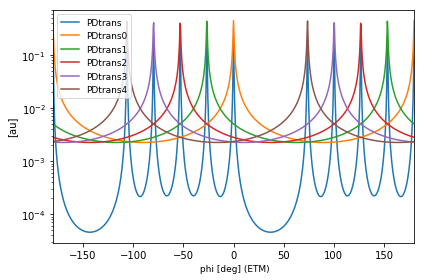

In [13]:
fig = out.plot()